In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
import pandas as pd

# Assuming df is your DataFrame
df = df.drop_duplicates()

In [6]:
# Check for missing values in the 'CodingActivities' column
df['CodingActivities'].isnull().sum()

np.int64(10971)

In [7]:
# Fill missing values using forward fill method
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_912\1424486631.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')


In [8]:
# Display column names that might relate to compensation
df.columns[df.columns.str.contains('Comp|Salary|Pay', case=False)]

Index(['CompTotal', 'AIComplex', 'ConvertedCompYearly'], dtype='object')

In [9]:
# Apply Min-Max Scaling
df['ConvertedCompYearly_MinMax'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / 
    (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
)

In [10]:
# Apply Z-score normalization
df['ConvertedCompYearly_Zscore'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / 
    df['ConvertedCompYearly'].std()
)

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# Assuming your dataframe is named df and already loaded

# Create Min-Max Normalized column
scaler = MinMaxScaler()
df['ConvertedCompYearly_Normalized'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Create Z-score Normalized column
df['ConvertedCompYearly_Zscore'] = zscore(df['ConvertedCompYearly'])

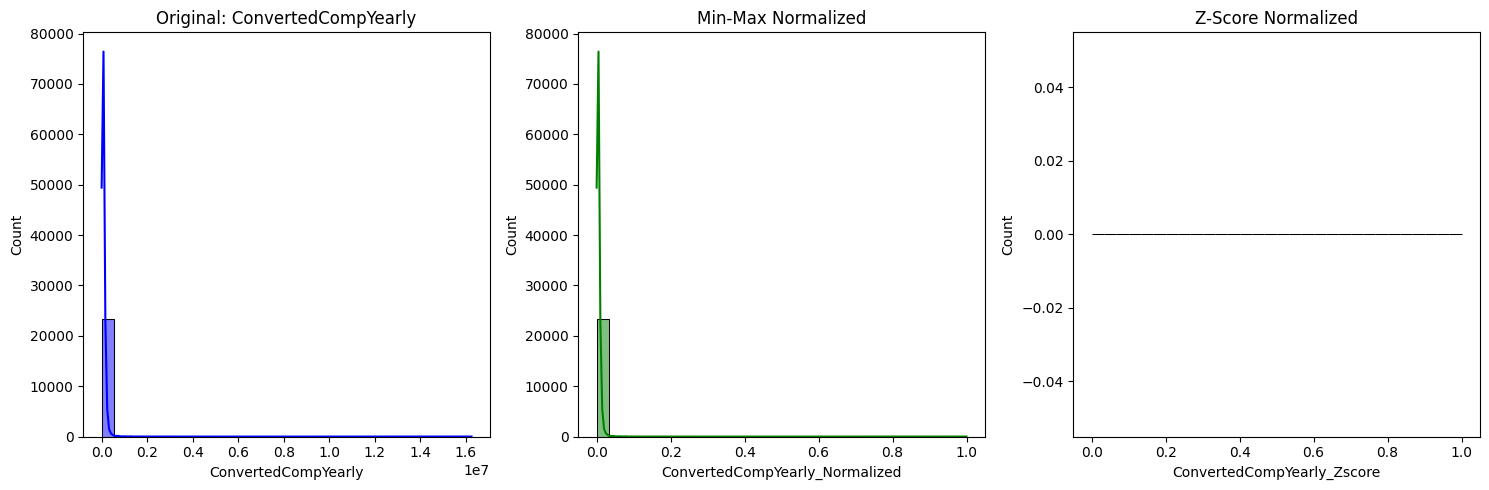

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True, color='blue')
plt.title("Original: ConvertedCompYearly")

# Min-Max Normalized data
plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_Normalized'], bins=30, kde=True, color='green')
plt.title("Min-Max Normalized")

# Z-Score Normalized data
plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], bins=30, kde=True, color='red')
plt.title("Z-Score Normalized")

plt.tight_layout()
plt.show()